In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [219]:
# Цель проекта - определиться с параметрами будущей модели
# Задачи проекта - провести разведывательный анализ данных и составить отчёт по его результатам

In [220]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [221]:
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [222]:
# Переименуем столбец studytime, granular в studytime_granular

stud_math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

In [223]:
# Начнем проверку столбцов

stud_math.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [224]:
stud_math.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [225]:
stud_math.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

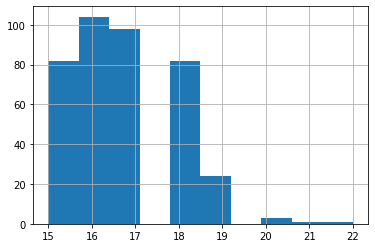

In [226]:
stud_math.age.hist()
stud_math.age.describe()

In [227]:
# На первый взгляд кажется что есть выбросы. Проверим и удалим его, если есть

median = stud_math.age.median()
IQR = stud_math.age.quantile(0.75) - stud_math.age.quantile(0.25)
print(median, IQR, median - 1.5*IQR, median + 1.5*IQR)

17.0 2.0 14.0 20.0


In [228]:
# Да, по формуле выбросы есть, но "Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет",
# наш минимум и максимум вписываются в выборку возрастов проекта, поэтому удалять не будем.

In [229]:
stud_math.address.value_counts(dropna=False)

U      295
R       83
NaN     17
Name: address, dtype: int64

In [230]:
stud_math.famsize.value_counts(dropna=False)

GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

In [231]:
stud_math.Pstatus.value_counts(dropna=False)

T      314
NaN     45
A       36
Name: Pstatus, dtype: int64

In [232]:
stud_math.Medu.value_counts(dropna=False)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: Medu, dtype: int64

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

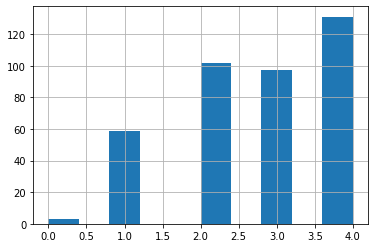

In [233]:
stud_math.Medu.hist()
stud_math.Medu.describe()

In [234]:
stud_math.Fedu.value_counts(dropna=False)

2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [235]:
# В этом столбце есть явный выброс, так как значение данного столбца не может быть больше 4
# Заменим этот выброс на Nan

stud_math['Fedu'] = stud_math['Fedu'].apply(
    lambda x: x if x in range(0, 5) else np.nan)
stud_math.Fedu.value_counts(dropna=False)

2.0    106
3.0     96
4.0     88
1.0     78
NaN     25
0.0      2
Name: Fedu, dtype: int64

In [236]:
stud_math.Mjob.value_counts(dropna=False)

other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64

In [237]:
stud_math.Fjob.value_counts(dropna=False)

other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [238]:
stud_math.reason.value_counts(dropna=False)

course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64

In [239]:
stud_math.guardian.value_counts(dropna=False)

mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64

In [240]:
stud_math.traveltime.value_counts(dropna=False)

1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [241]:
stud_math.studytime.value_counts(dropna=False)

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64

In [242]:
stud_math.failures.value_counts(dropna=False)

0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

In [243]:
stud_math.schoolsup.value_counts(dropna=False)

no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

In [244]:
stud_math.famsup.value_counts(dropna=False)

yes    219
no     137
NaN     39
Name: famsup, dtype: int64

In [245]:
stud_math.paid.value_counts(dropna=False)

no     200
yes    155
NaN     40
Name: paid, dtype: int64

In [246]:
stud_math.activities.value_counts(dropna=False)

yes    195
no     186
NaN     14
Name: activities, dtype: int64

In [247]:
stud_math.nursery.value_counts(dropna=False)

yes    300
no      79
NaN     16
Name: nursery, dtype: int64

In [248]:
stud_math.studytime_granular.value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64

In [249]:
# О столбце studytime_granular не известно из задания ято он обозначает, возможно позже мы увидим что его можно просто удалить

stud_math.higher.value_counts(dropna=False)

yes    356
NaN     20
no      19
Name: higher, dtype: int64

In [250]:
stud_math.internet.value_counts(dropna=False)

yes    305
no      56
NaN     34
Name: internet, dtype: int64

In [251]:
stud_math.romantic.value_counts(dropna=False)

no     240
yes    124
NaN     31
Name: romantic, dtype: int64

In [252]:
stud_math.famrel.value_counts(dropna=False)

 4.0    182
 5.0     99
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [253]:
# В столбце мы видим невозможное значение. Переименуем его на NaN

stud_math['famrel'] = stud_math['famrel'].apply(lambda x: x if x in range(1, 6) else np.nan)
stud_math.famrel.value_counts(dropna=False)

4.0    182
5.0     99
3.0     62
NaN     28
2.0     17
1.0      7
Name: famrel, dtype: int64

In [254]:
stud_math.freetime.value_counts(dropna=False)

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64

In [255]:
stud_math.goout.value_counts(dropna=False)

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
NaN      8
Name: goout, dtype: int64

In [256]:
stud_math.health.value_counts(dropna=False)

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
NaN     15
Name: health, dtype: int64

In [257]:
stud_math.absences.value_counts(dropna=False)

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
NaN       12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

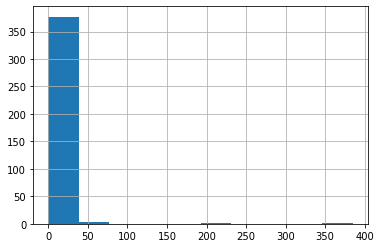

In [258]:
stud_math.absences.hist()
stud_math.absences.describe()

In [259]:
# Нам неизвестно сколько всего было занятий и мы не можем воспользоваться каким-то определенным максисумом,
# поэтому выясним стаитстические выбросы

median = stud_math.absences.median()
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
print(median, IQR, median - 1.5*IQR, median + 1.5*IQR)

4.0 8.0 -8.0 16.0


In [260]:
# Так как можно признать выбросами по этому методу очень много значений,
# мы откажемся только от значений больше 100, описаясь на график выше

stud_math['absences'] = stud_math['absences'].apply(lambda x: x if x <= 100 else np.nan)
stud_math.absences.value_counts(dropna=False)

0.0     111
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
NaN      14
14.0     12
12.0     12
3.0       8
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
1.0       3
22.0      3
9.0       3
15.0      2
13.0      2
11.0      2
25.0      1
17.0      1
54.0      1
26.0      1
56.0      1
23.0      1
28.0      1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
24.0      1
Name: absences, dtype: int64

In [261]:
stud_math.score.value_counts(dropna=False)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

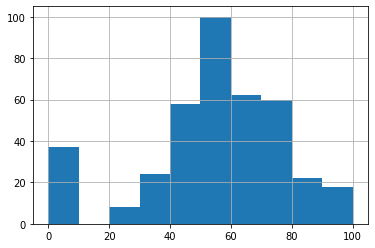

In [262]:
stud_math.score.hist()
stud_math.score.describe()

In [263]:
# Начнем корреляционный анализ

stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.159546,0.081508,-0.015556,0.228047,0.015556,0.063539,0.029023,0.135107,-0.065946,0.166773,-0.155726
Medu,-0.161704,1.000000,0.629956,-0.173515,0.078589,-0.245463,-0.078589,-0.020896,0.025335,0.064164,-0.045051,0.097295,0.213349
Fedu,-0.159546,0.629956,1.000000,-0.155459,0.008603,-0.271936,-0.008603,-0.035788,-0.021415,0.046581,0.022588,0.041440,0.130002
traveltime,0.081508,-0.173515,-0.155459,1.000000,-0.102206,0.064699,0.102206,-0.028220,-0.021937,0.037636,-0.021531,-0.014040,-0.070559
studytime,-0.015556,0.078589,0.008603,-0.102206,1.000000,-0.178992,-1.000000,0.028918,-0.121969,-0.051280,-0.080016,-0.067734,0.115741
failures,0.228047,-0.245463,-0.271936,0.064699,-0.178992,1.000000,0.178992,0.011942,0.098382,0.120914,0.081284,0.069703,-0.344338
studytime_granular,0.015556,-0.078589,-0.008603,0.102206,-1.000000,0.178992,1.000000,-0.028918,0.121969,0.051280,0.080016,0.067734,-0.115741
famrel,0.063539,-0.020896,-0.035788,-0.028220,0.028918,0.011942,-0.028918,1.000000,0.164324,0.069241,0.097910,-0.041527,0.051219
freetime,0.029023,0.025335,-0.021415,-0.021937,-0.121969,0.098382,0.121969,0.164324,1.000000,0.296437,0.061575,-0.070416,0.019026
goout,0.135107,0.064164,0.046581,0.037636,-0.051280,0.120914,0.051280,0.069241,0.296437,1.000000,-0.015608,0.036836,-0.129685


In [264]:
# Тут мы видим, что у studytime_granular и studytime полностью скоррелированы. Удалим studytime_granular.

stud_math.drop(columns=['studytime_granular'], inplace=True)

In [265]:
stud_math.corr().applymap(lambda x: x if x > 0.5 else '')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1,,,,,,,,,,,
Medu,,1,0.629956,,,,,,,,,
Fedu,,0.629956,1,,,,,,,,,
traveltime,,,,1,,,,,,,,
studytime,,,,,1,,,,,,,
failures,,,,,,1,,,,,,
famrel,,,,,,,1,,,,,
freetime,,,,,,,,1,,,,
goout,,,,,,,,,1,,,
health,,,,,,,,,,1,,


In [201]:
# Видим, что полностью скоррелированных данных нет. Только в образовании матерей и отцов есть интересная зависимость. 

In [266]:
# Рассмотрим подближе корреляцию только для числовых столбцов.

stud_math[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.166773,-0.155726
absences,0.166773,1.000000,0.031698
score,-0.155726,0.031698,1.000000


In [203]:
# Видим что возраст сказывается не лучшим образом

In [204]:
# Начнем анализ номинативных переменных

In [267]:
# Функция для постояния бокспотов


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

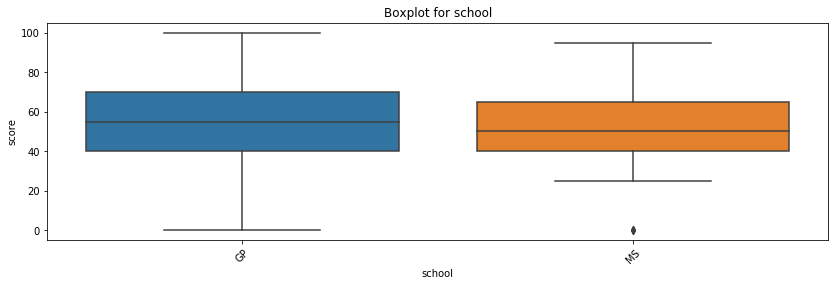

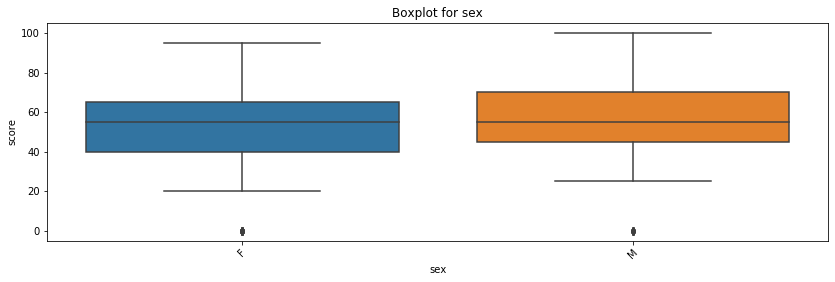

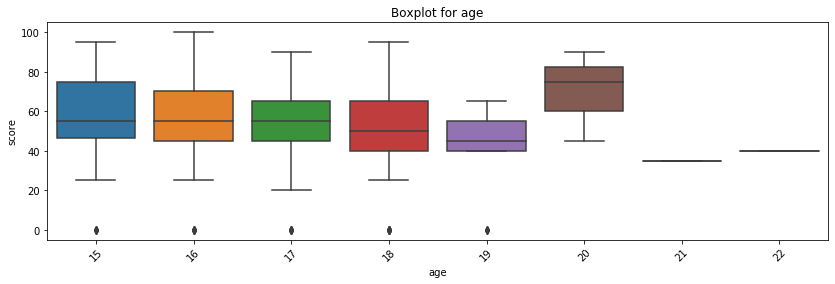

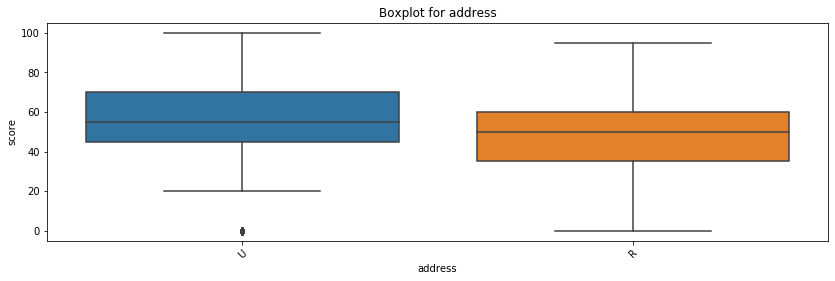

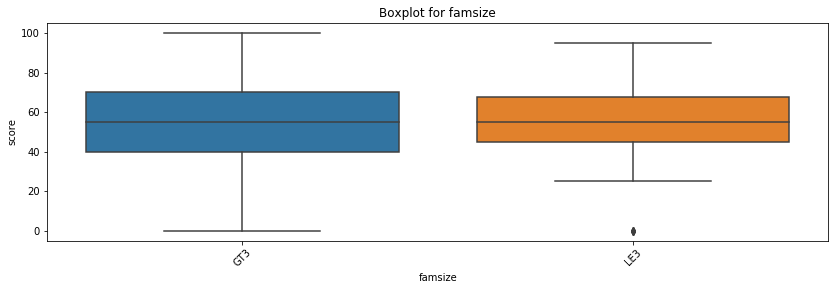

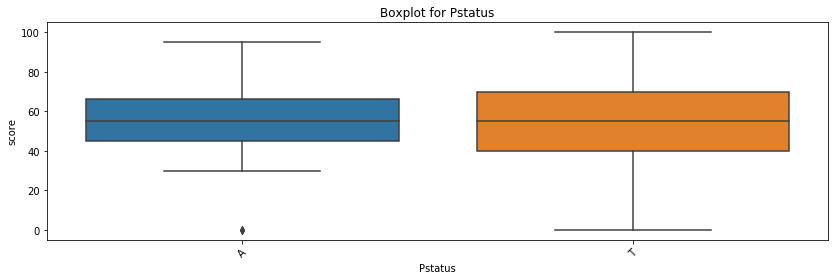

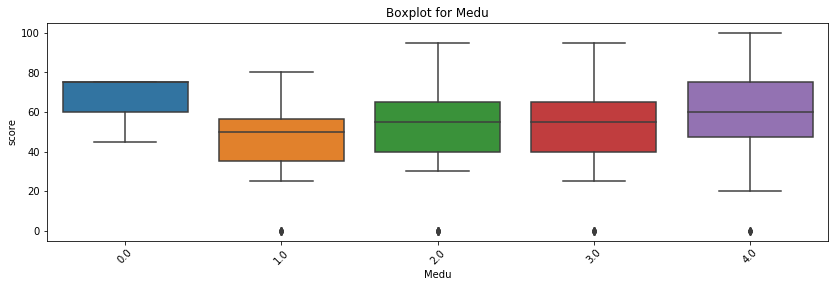

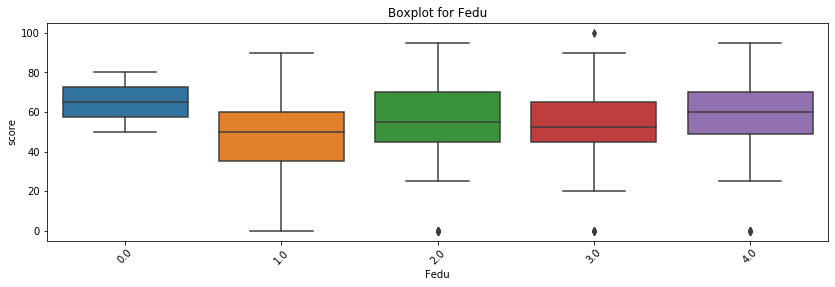

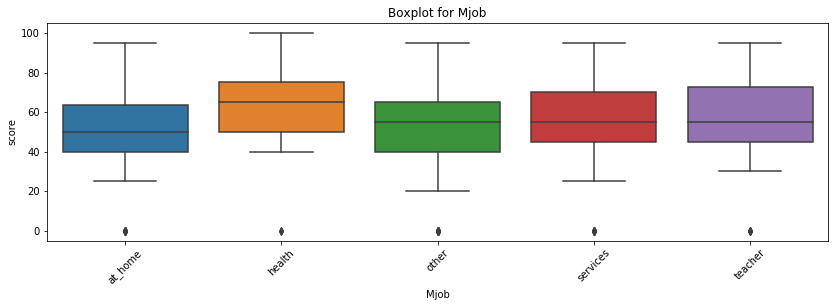

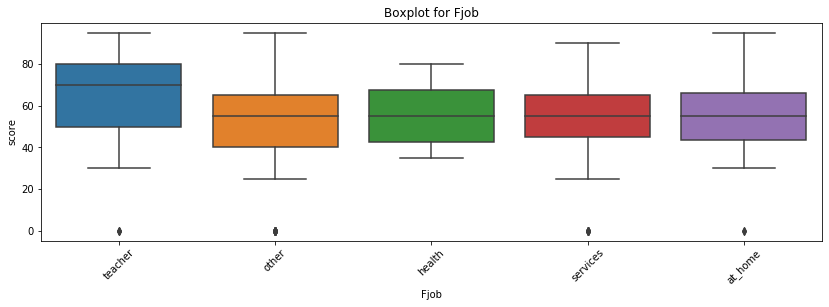

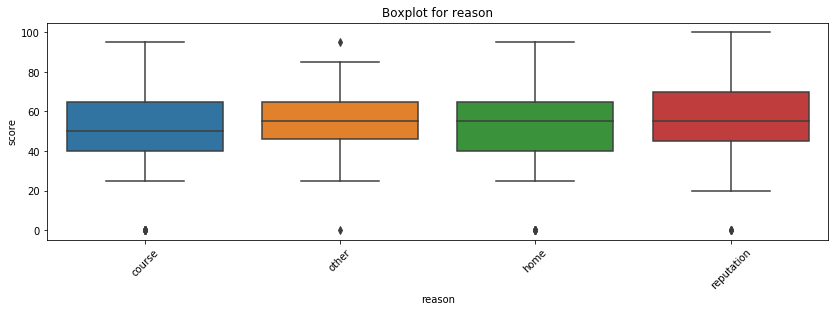

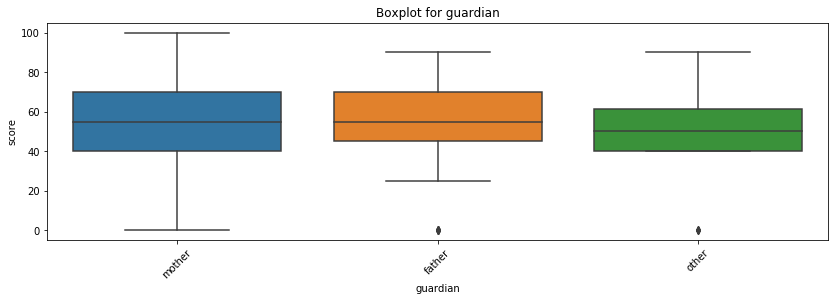

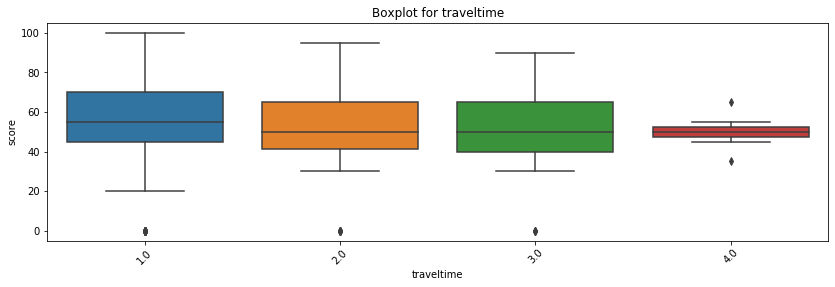

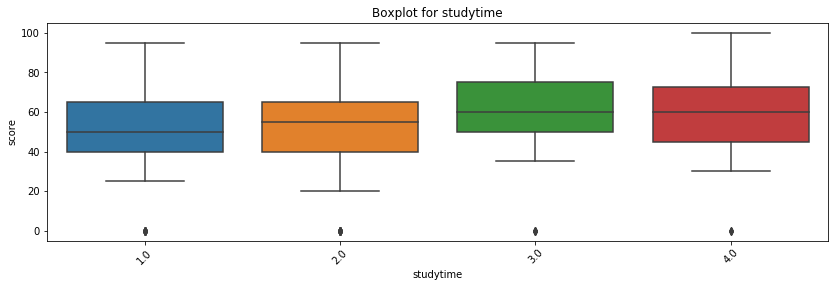

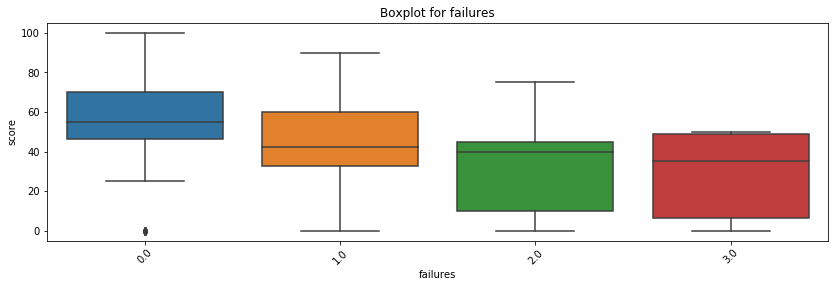

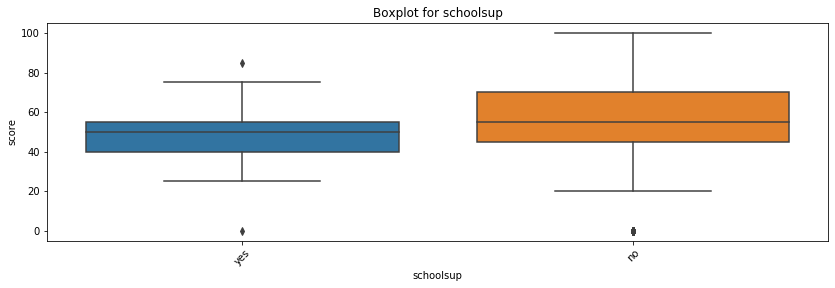

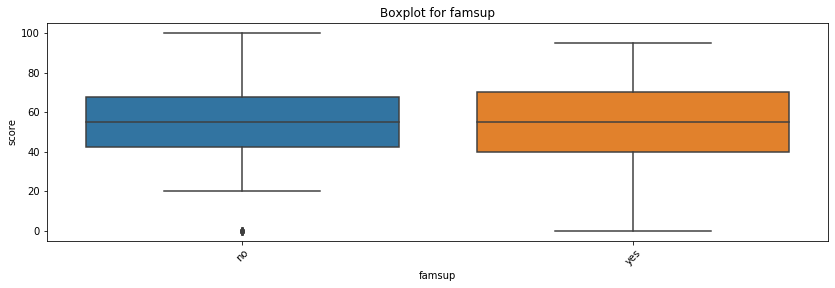

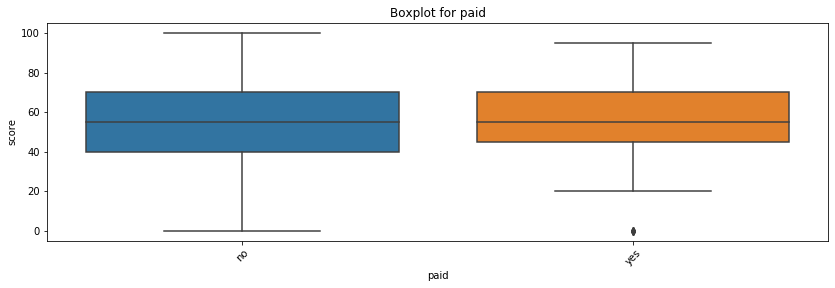

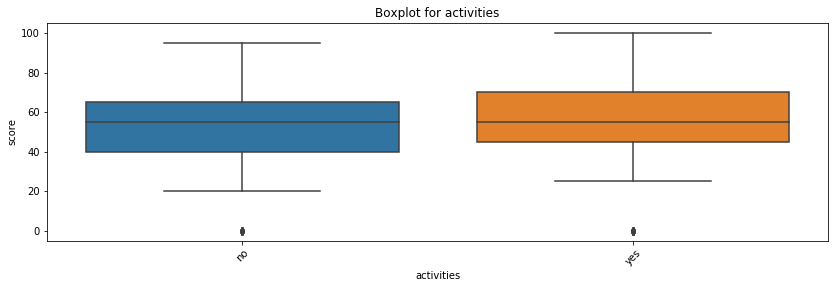

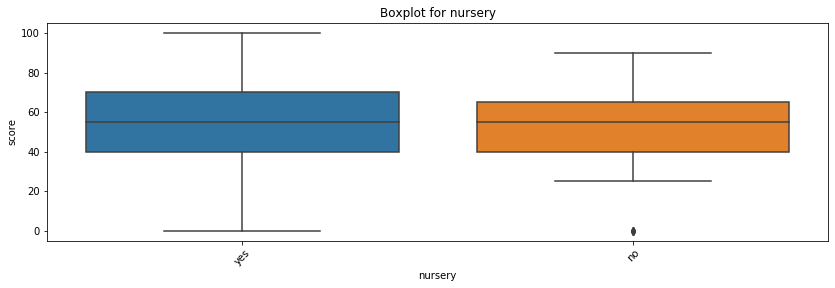

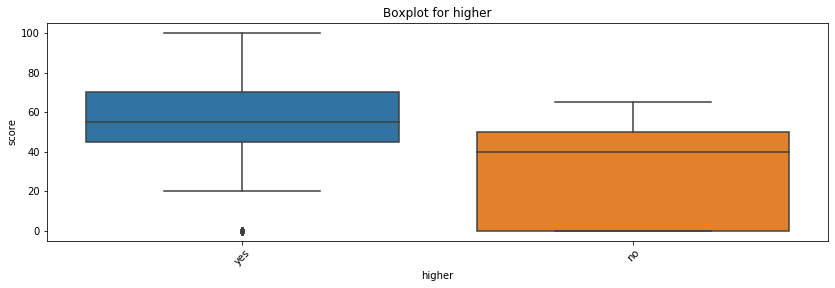

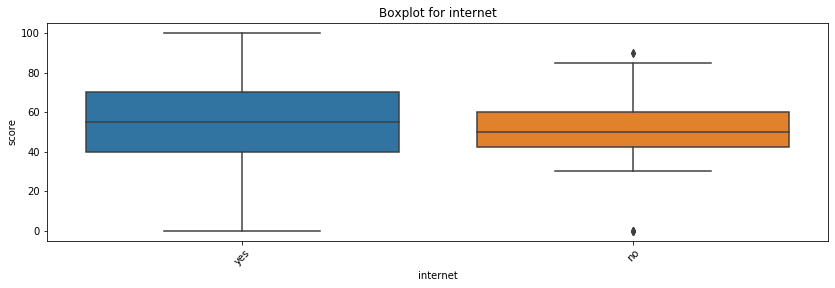

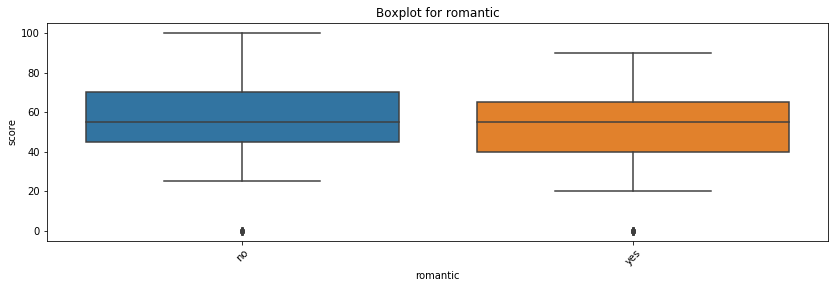

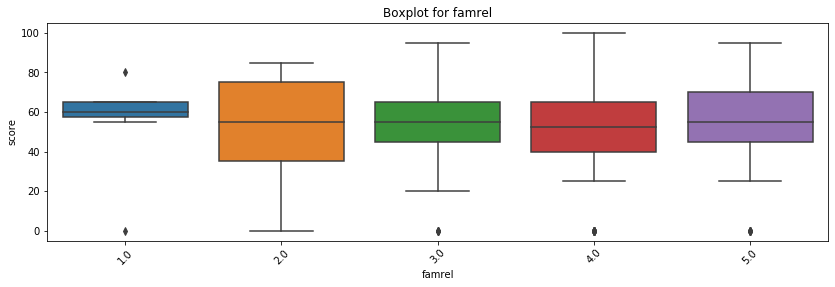

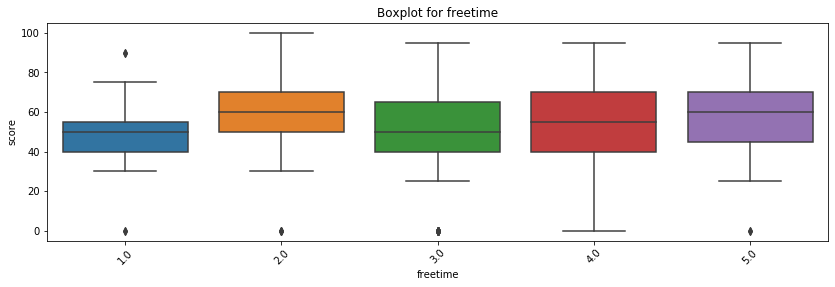

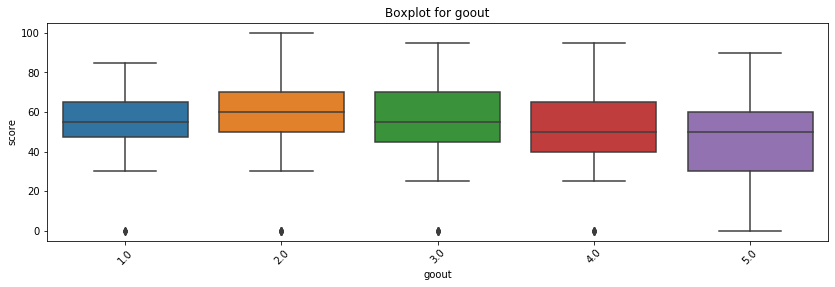

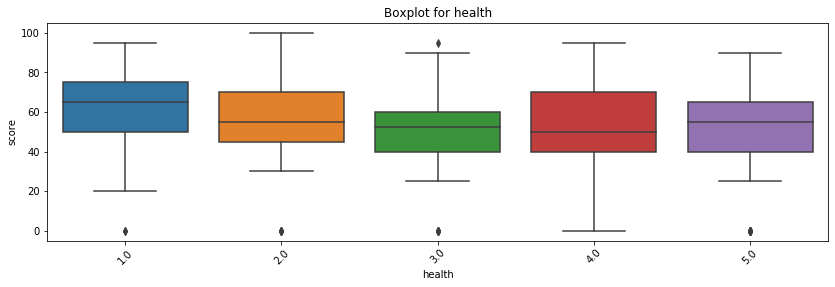

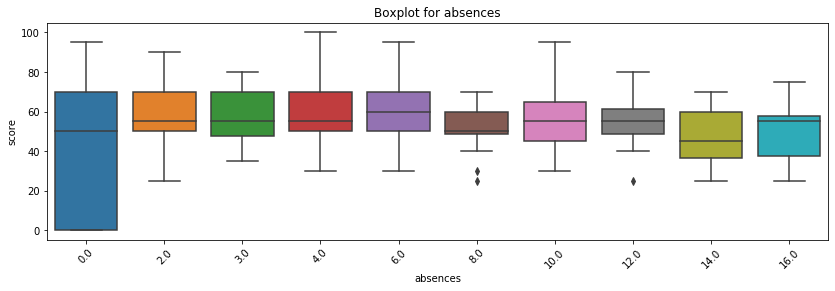

In [268]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'health', 'absences']:
    get_boxplot(col)

In [207]:
# По графикам похоже, что очень сильно могут влиять параметры: age, address, Medu,
# Fedu, Mjob, studytime, failtures, schoolsup, higher, famrel, freetime, goout, adsences.
# Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика.
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.
# Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [269]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [209]:
# Перед применением функции очистим от пропусков данные

In [270]:
stud_math.dropna(inplace=True)

In [272]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'health', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки famsize


In [213]:
# Как мы видим, серьёзно отличаются три параметра: sex,  address и famsize. 
# Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, 
# возможно, оказывают влияние на оценку, это: 
# sex, address, famsize, age, Medu, Fedu, Mjob, studytime, failtures, schoolsup, higher, famrel, freetime, goout, adsences.

In [273]:
list_columns = ['sex', 'address', 'famsize', 'age', 'Medu', 'Fedu', 'Mjob', 'studytime',
                'failures', 'schoolsup', 'higher', 'famrel', 'freetime', 'goout', 'absences', 'score']
list_columns

['sex',
 'address',
 'famsize',
 'age',
 'Medu',
 'Fedu',
 'Mjob',
 'studytime',
 'failures',
 'schoolsup',
 'higher',
 'famrel',
 'freetime',
 'goout',
 'absences',
 'score']

In [274]:
stud_math_for_model = stud_math[list_columns]

In [275]:
stud_math_for_model.head()

,sex,address,famsize,age,Medu,Fedu,Mjob,studytime,failures,schoolsup,higher,famrel,freetime,goout,absences,score
4,F,U,GT3,16,3.0,3.0,other,2.0,0.0,no,yes,4.0,3.0,2.0,4.0,50.0
5,M,U,LE3,16,4.0,3.0,services,2.0,0.0,no,yes,5.0,4.0,2.0,10.0,75.0
7,F,U,GT3,17,4.0,4.0,other,2.0,0.0,yes,yes,4.0,1.0,4.0,6.0,30.0
10,F,U,GT3,15,4.0,4.0,teacher,2.0,0.0,no,yes,3.0,3.0,3.0,0.0,45.0
14,M,U,GT3,15,2.0,2.0,other,3.0,0.0,no,yes,4.0,5.0,2.0,0.0,80.0


In [ ]:
# Примечания:
# 1. Выбросы были заменены на Nan в столбцах: Fedu, famrel, absences,
#    что позволяет сделать вывод о том, что данные достаточно чистые.
# 2. В большей части столбиков было много пустых значений.
#
# Гипотезы и некоторые выводы:
# 1. Отрицательная корреляция параметров age и score может нам говорить о том,
#    что с взрослением успеваемость незначительно снижается.
#    Но в 20 лет наблюдается активный скачок оценок, возможно это связанно как-то с поступлением. Или с поддержкой от школы.
# 2. Небольшая положительная корреляция параметров absences и score кажется случайной,
#    потому что успеваемость не должна рости с ростом количества прогулов.
# 3. Заметно отличие в оценках у городских детей и тех, кто живет за городом.
#    Возможно это связано с оставшимся времени после пути до дома или со свободным временем.
# 4. Виден рост оценок учеников, с ростом образования матери. Но так же видно, что отсутствие образования матеки вляет положительно.
#    Возможно данные не верны или матери без образования более внимательно относятся к образованию ребенка.
# 5. Примерно та же картина с образованием отца.
# 6. Интересно что возможно работа матери в сфере здравоохранения и учителем положительно сказывается на оценках ребенка.
#    В обношении работы отца видна единственная закономерность - если он работает учителем, то у ребенка выше оценки.
#    Даже выше, чем у матери-учительницы.
# 7. Время на учёбу помимо школы в неделю очевидно положительно сказывается на оценках ребенка. Но так же видно, что при
#    более 10 часах - успеаемость ухудшается. Что еще раз доказывает, что мозгу нужен отдых.
# 8. Так же очевидна сильная зависимость оценок и количества внеучебных неудач, чем их больше, тем ниже оценки.
# 9. Интересно что дополнительная образовательная поддержка сказывается хуже на оценках. Гипотез почему так у меня нет.
# 10. Желание получить высшее образование сильно полодительно влияет на оценки.
# 11. По влиянию отношений в семье на оценки, мне сложно сделать гипотезу, так как непонятно что значат очень плохие, хотя мы видим,
#     что при данном ответе оценки не самые низкие. Возможно эти дети замкнуты и поэтому углубляются в учебу.
# 12. Чем больше свободного время после школы - тем лучше оценки
# 13. Чем болше проведение времени с друзьями - тем хуже оценки, но немного его необоходимо
#
# Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex, address, famsize, age,
#    Medu, Fedu, Mjob, studytime, failures, schoolsup, higher, famrel, freetime, goout, absences.